## Importing the dependencies.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from geopy.distance import geodesic

### Loading the data.

In [84]:
# Loading the data
data = pd.read_csv("notebooks/swiggy.csv")
data.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
27779,0x7ebf,COIMBRES17DEL02,22,4.7,11.026117,76.944652,11.106117,77.024652,04-03-2022,19:40:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Urban,(min) 26
26483,0x6fac,RANCHIRES08DEL02,37,4.5,23.353783,85.326967,23.403783,85.376967,24-03-2022,19:00:00,19:05:00,conditions Sandstorms,Medium,2,Meal,electric_scooter,1,No,NaN,(min) 26
33254,0xb8b7,COIMBRES07DEL02,37,4.6,10.961850,76.971082,11.041850,77.051082,12-03-2022,20:35:00,20:40:00,conditions Fog,Jam,0,Drinks,motorcycle,1,Yes,Metropolitian,(min) 53
2199,0xc8af,AURGRES14DEL03,30,4.7,19.875016,75.322405,19.905016,75.352405,15-02-2022,19:35:00,19:50:00,conditions Sandstorms,Jam,2,Drinks,scooter,0,No,Metropolitian,(min) 29
25579,0x52d2,INDORES13DEL02,34,4.5,22.745049,75.892471,22.795049,75.942471,24-03-2022,18:10:00,18:25:00,conditions Cloudy,Medium,1,Buffet,scooter,1,No,Metropolitian,(min) 16


In [85]:
# Shape of data.
rows, columns = data.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 45593 rows and 20 columns.


- The dataset has 45593 rows and 20 columns.

In [86]:
# Column data types
data.dtypes.reset_index().rename(columns = {'index' : 'Column Name', 0 : 'Data Type'})

,Column Name,Data Type
0,ID,object
1,Delivery_person_ID,object
2,Delivery_person_Age,object
3,Delivery_person_Ratings,object
4,Restaurant_latitude,float64
5,Restaurant_longitude,float64
6,Delivery_location_latitude,float64
7,Delivery_location_longitude,float64
8,Order_Date,object
9,Time_Orderd,object


In [87]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

- Delivery_person_Age should be numeric(int/float).
- Delivery_person_Ratings should be numeric(int/float).
- Order_Date should be in datatime format.
- Time_Orderd should be in time format.
- Time_Order_picked should be in time format.
- Vehicle_condition is categorical/nominal and integer coded.
- multiple_deliveries should be integer.
- Time_taken(min) i.e. target column should be in time format.


In [88]:
# Missing values in the data.
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

- There are no missing values in the data.

In [89]:
# sampling 10 rows of data for viewing

data.sample(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
34326,0xd9bc,GOARES15DEL01,32,3.8,15.513150,73.783460,15.583150,73.853459,16-02-2022,21:50:00,22:00:00,conditions Windy,Jam,1,Meal,scooter,2,No,Metropolitian,(min) 40
29708,0x4d73,PUNERES05DEL01,25,4.9,18.543626,73.905101,18.653626,74.015101,02-04-2022,22:10:00,22:20:00,conditions Cloudy,Low,0,Snack,motorcycle,0,No,Metropolitian,(min) 21
27837,0x19ae,SURRES05DEL03,39,4.6,21.175104,72.804342,21.205104,72.834342,05-03-2022,18:35:00,18:50:00,conditions Fog,Medium,2,Drinks,electric_scooter,0,No,Metropolitian,(min) 17
14002,0x3a6c,JAPRES07DEL02,23,4.8,26.766536,75.837333,26.786536,75.857333,28-03-2022,11:40:00,11:45:00,conditions Fog,High,2,Snack,scooter,0,No,Metropolitian,(min) 34
18846,0x2d5a,CHENRES13DEL01,38,4.5,13.027018,80.254791,13.037018,80.264791,09-03-2022,09:20:00,09:35:00,conditions Windy,Low,1,Snack,scooter,1,No,Metropolitian,(min) 25
19762,0x9b4e,INDORES12DEL02,28,4.6,22.748060,75.893400,22.828060,75.973400,06-04-2022,18:50:00,19:00:00,conditions Fog,Medium,1,Snack,scooter,1,No,Metropolitian,(min) 39
8559,0x97f6,PUNERES03DEL01,20,4.9,18.554382,73.798206,18.594382,73.838206,11-03-2022,15:20:00,15:30:00,conditions Stormy,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 28
34220,0x8d8c,MUMRES17DEL03,25,4.7,19.121999,72.908493,19.151999,72.938493,03-03-2022,23:00:00,23:15:00,conditions Cloudy,Low,2,Snack,scooter,0,No,Urban,(min) 13
21617,0xd5f4,KOCRES12DEL03,33,4.9,9.988483,76.295211,10.018483,76.325211,17-02-2022,18:10:00,18:20:00,conditions Stormy,Medium,0,Meal,motorcycle,0,No,Metropolitian,(min) 27
38249,0x98c6,BANGRES01DEL01,36,5,12.933284,77.615428,13.043284,77.725428,25-03-2022,22:40:00,22:55:00,conditions Stormy,Low,2,Meal,scooter,1,No,Urban,(min) 25


- From here we can infer that there are many Nan values apperaing in the data.

### Missing Values in the data.

In [90]:
data.loc[13926, 'Delivery_person_Age']

'NaN '

- It can be seen from here that there are extra spaces in NaN on the right side.

In [91]:
# column wise string NaNs

(data == "NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [92]:
# Total NaN values in the data
(data == 'NaN ').sum().sum()

np.int64(8515)

- It can be seen from here that there are 8515 NaN values overall in the data till yet.
- Delivery_person_Age has 1854 NaN values.
- Delivery_person_Ratings has 1908 NaN values.
- Time_Orderd has 1731 NaN values.
- Road_traffic_density has 601 NaN values.
- multiple_deliveries has 993 NaN values.
- Festival has 228 NaN values.
- City has 1200 NaN values.



- Replacing "NaN " string with 'nan'

In [93]:
data = data.replace(to_replace = 'NaN ', value = np.nan)
data['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', nan, '28', '39', '30', '15',
       '50'], dtype=object)

In [94]:
data.sample(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
32723,0x2ed4,RANCHIRES19DEL03,24,4.8,23.333017,85.317200,23.423017,85.407200,08-03-2022,22:45:00,23:00:00,conditions Fog,Low,2,Buffet,scooter,0,No,Urban,(min) 25
27058,0x83b4,VADRES16DEL01,28,4.9,0.000000,0.000000,0.110000,0.110000,31-03-2022,20:45:00,20:55:00,conditions Sunny,Jam,2,Drinks,motorcycle,1,No,Urban,(min) 18
14917,0xad76,INDORES04DEL01,32,4.3,22.753659,75.903365,22.793659,75.943365,11-03-2022,15:45:00,16:00:00,conditions Windy,Medium,0,Snack,motorcycle,0,No,Metropolitian,(min) 33
12900,0x3023,MYSRES010DEL03,29,4.8,12.321214,76.621094,12.411214,76.711094,02-04-2022,22:00:00,22:15:00,conditions Fog,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 46
30153,0x938a,MYSRES08DEL01,31,3.5,12.297954,76.665169,12.407954,76.775169,27-03-2022,23:45:00,00:00:00,conditions Cloudy,Low,2,Meal,electric_scooter,1,No,Metropolitian,(min) 33
2839,0xb551,JAPRES12DEL02,24,4.6,26.902908,75.792934,26.922908,75.812934,24-03-2022,08:20:00,08:25:00,conditions Fog,Low,2,Buffet,motorcycle,0,No,Metropolitian,(min) 15
24346,0xb049,RANCHIRES15DEL03,29,4.3,23.369746,85.339820,23.429746,85.399820,03-03-2022,22:25:00,22:30:00,conditions Stormy,Low,0,Drinks,motorcycle,0,No,Metropolitian,(min) 26
11855,0x5bdf,SURRES02DEL03,26,4.4,21.186608,72.794136,21.246608,72.854136,15-03-2022,23:20:00,23:30:00,conditions Sandstorms,Low,0,Meal,motorcycle,1,No,Urban,(min) 21
40541,0x9709,SURRES16DEL03,20,4.6,21.160437,72.774209,21.220437,72.834209,03-03-2022,21:30:00,21:40:00,conditions Stormy,Jam,2,Buffet,scooter,0,No,Urban,(min) 14
13397,0x7614,PUNERES19DEL03,27,4.6,18.563934,73.915367,18.623935,73.975367,15-03-2022,19:00:00,19:05:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,1,No,Metropolitian,(min) 24


In [95]:
# To verify if the replacement was successful.
data.replace(to_replace = "NaN ", value = np.nan).isnull().sum().sum()

np.int64(8515)

- Now in weather condition columns there is explicit conditions word like "conditions NaN" in each row. Let's replace it with a blank and also replacing the NaNs present.

In [96]:
data['Weatherconditions'] = data['Weatherconditions'].str.replace('conditions ', '').replace('NaN', np.nan)
data['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

In [97]:
# Total missing values/NaN in entire DataFrame
total_missing = data.isnull().sum().sum()
print(f"Total missing values in entire DataFrame is --> {total_missing}.")

Total missing values in entire DataFrame is --> 9131.


## Missing Value Analysis

<Axes: >

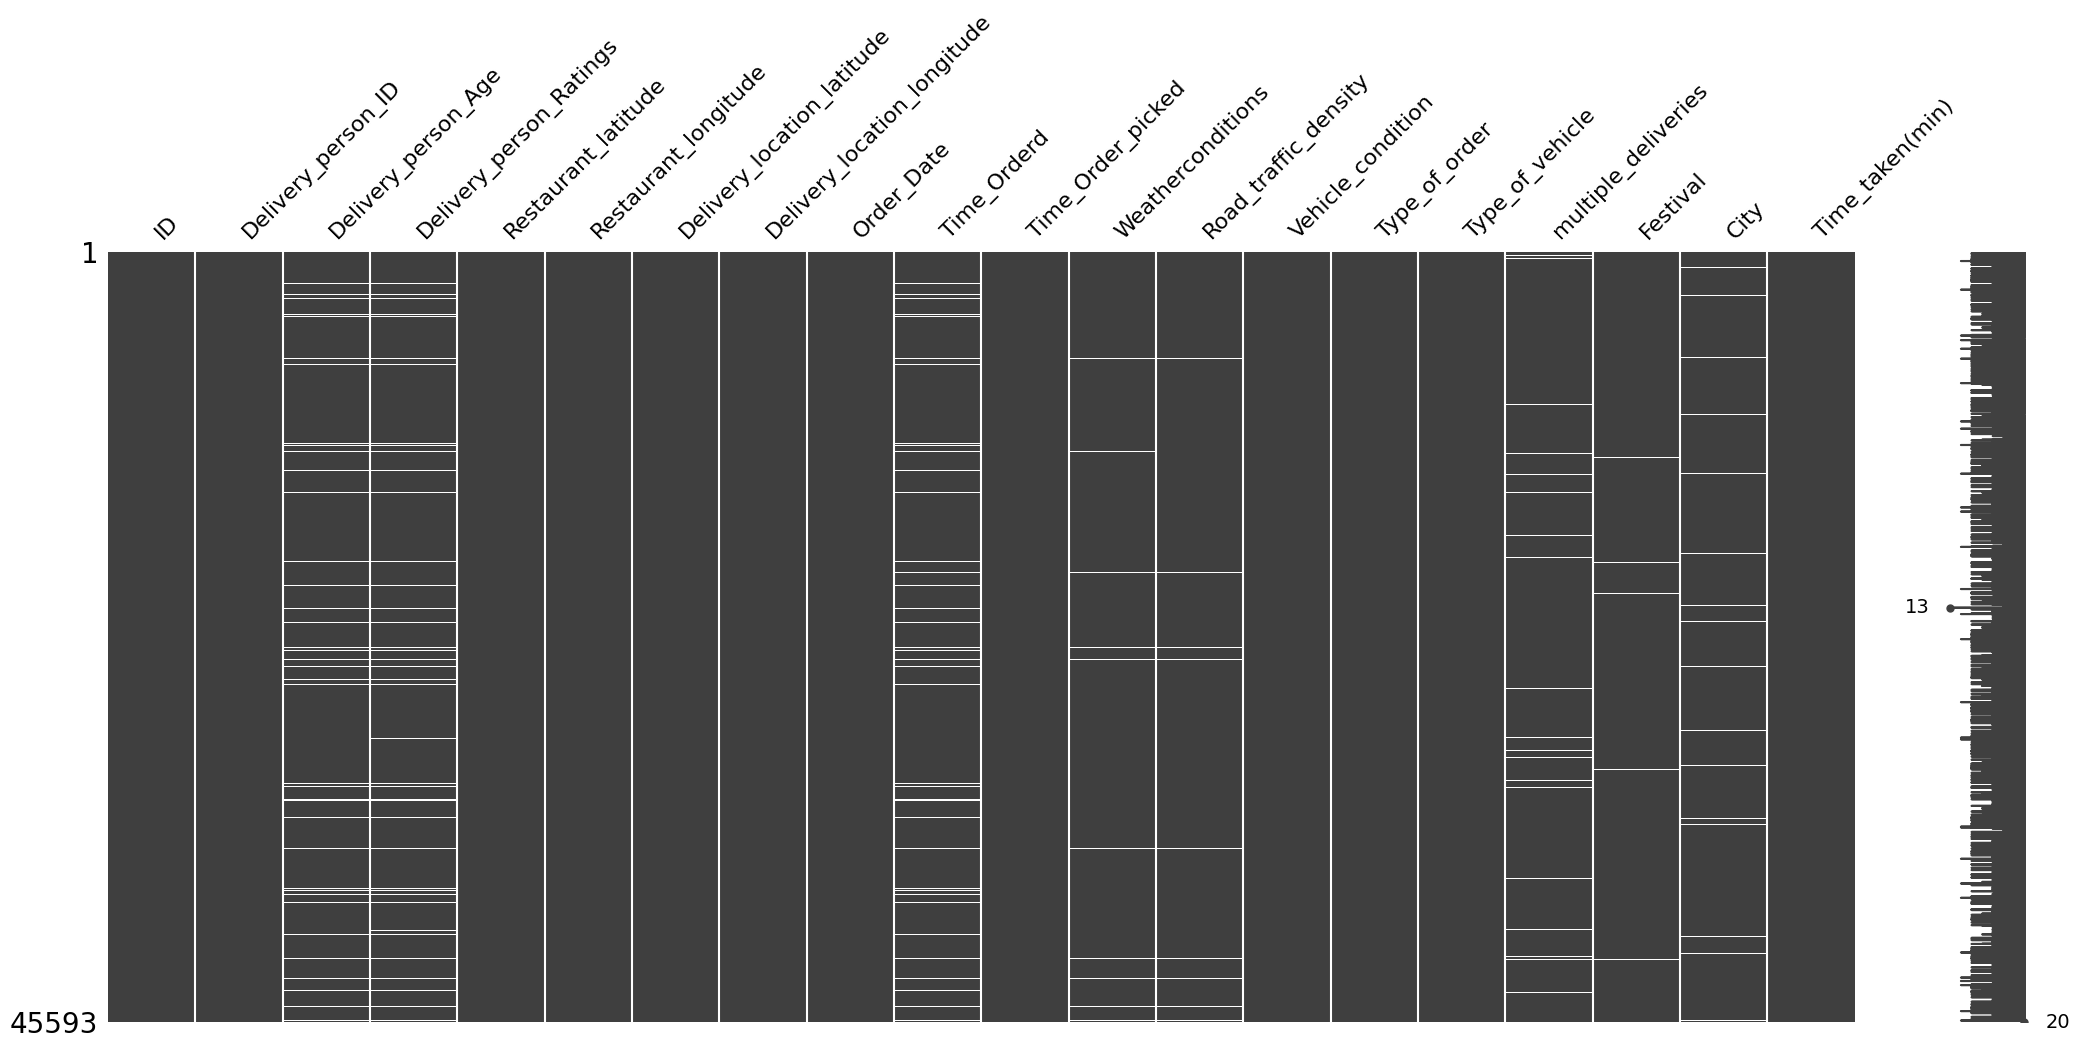

In [98]:
# Missing values representation
msno.matrix(data)

#### Observations
- Delivery_person_Ratings, Delivery_person_Age and Time_Ordered are highly corelated with each other. The missing values relate. Since order time and rider details are missing, it is possible that networks were weak to login rider details.
- Weatherconditions and Road_traffic_density missing points also have a relation with each other. It's just that missing value in one column has high chance that other column value is also missing. 

<Axes: >

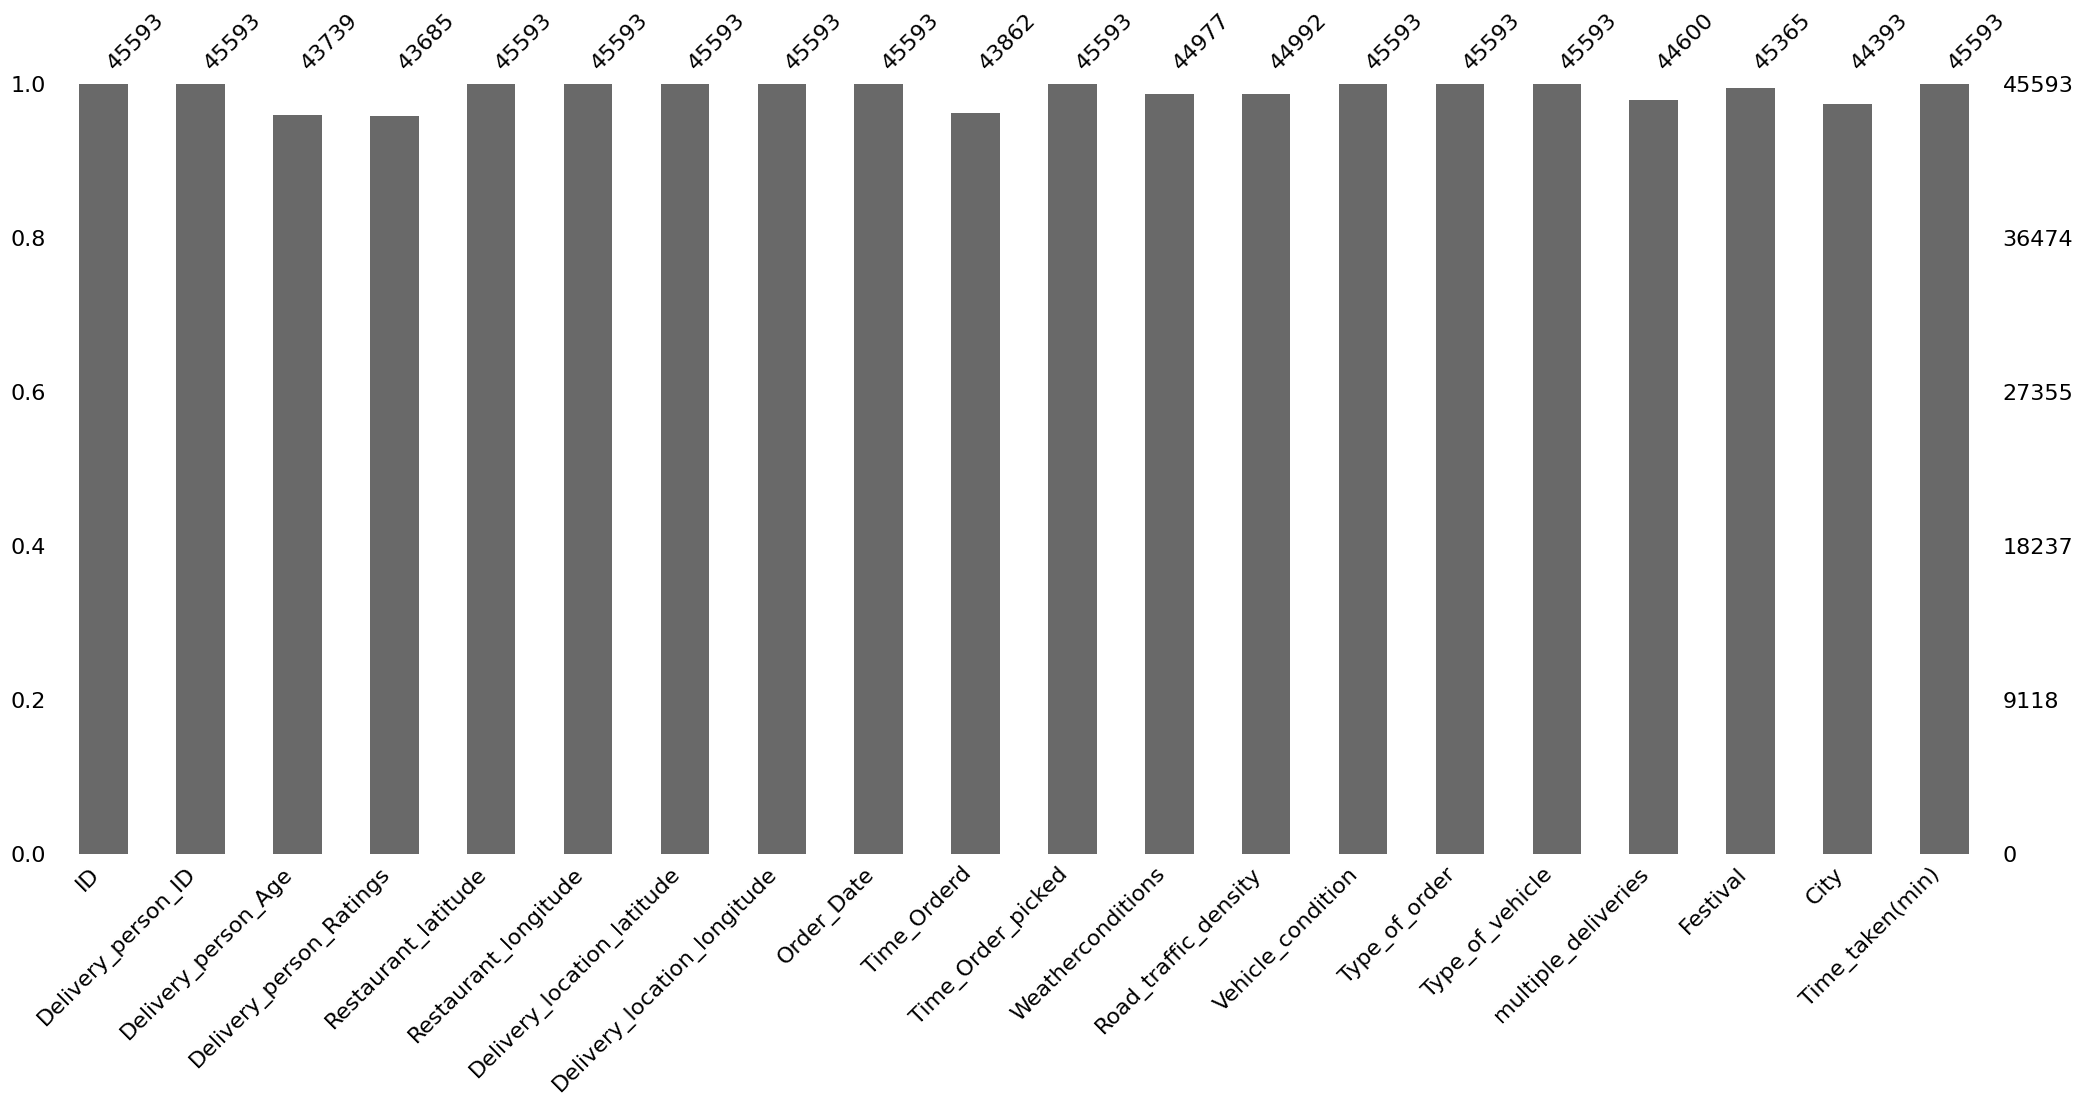

In [99]:
# Bar plot for count of missing data.
msno.bar(data)

<Axes: >

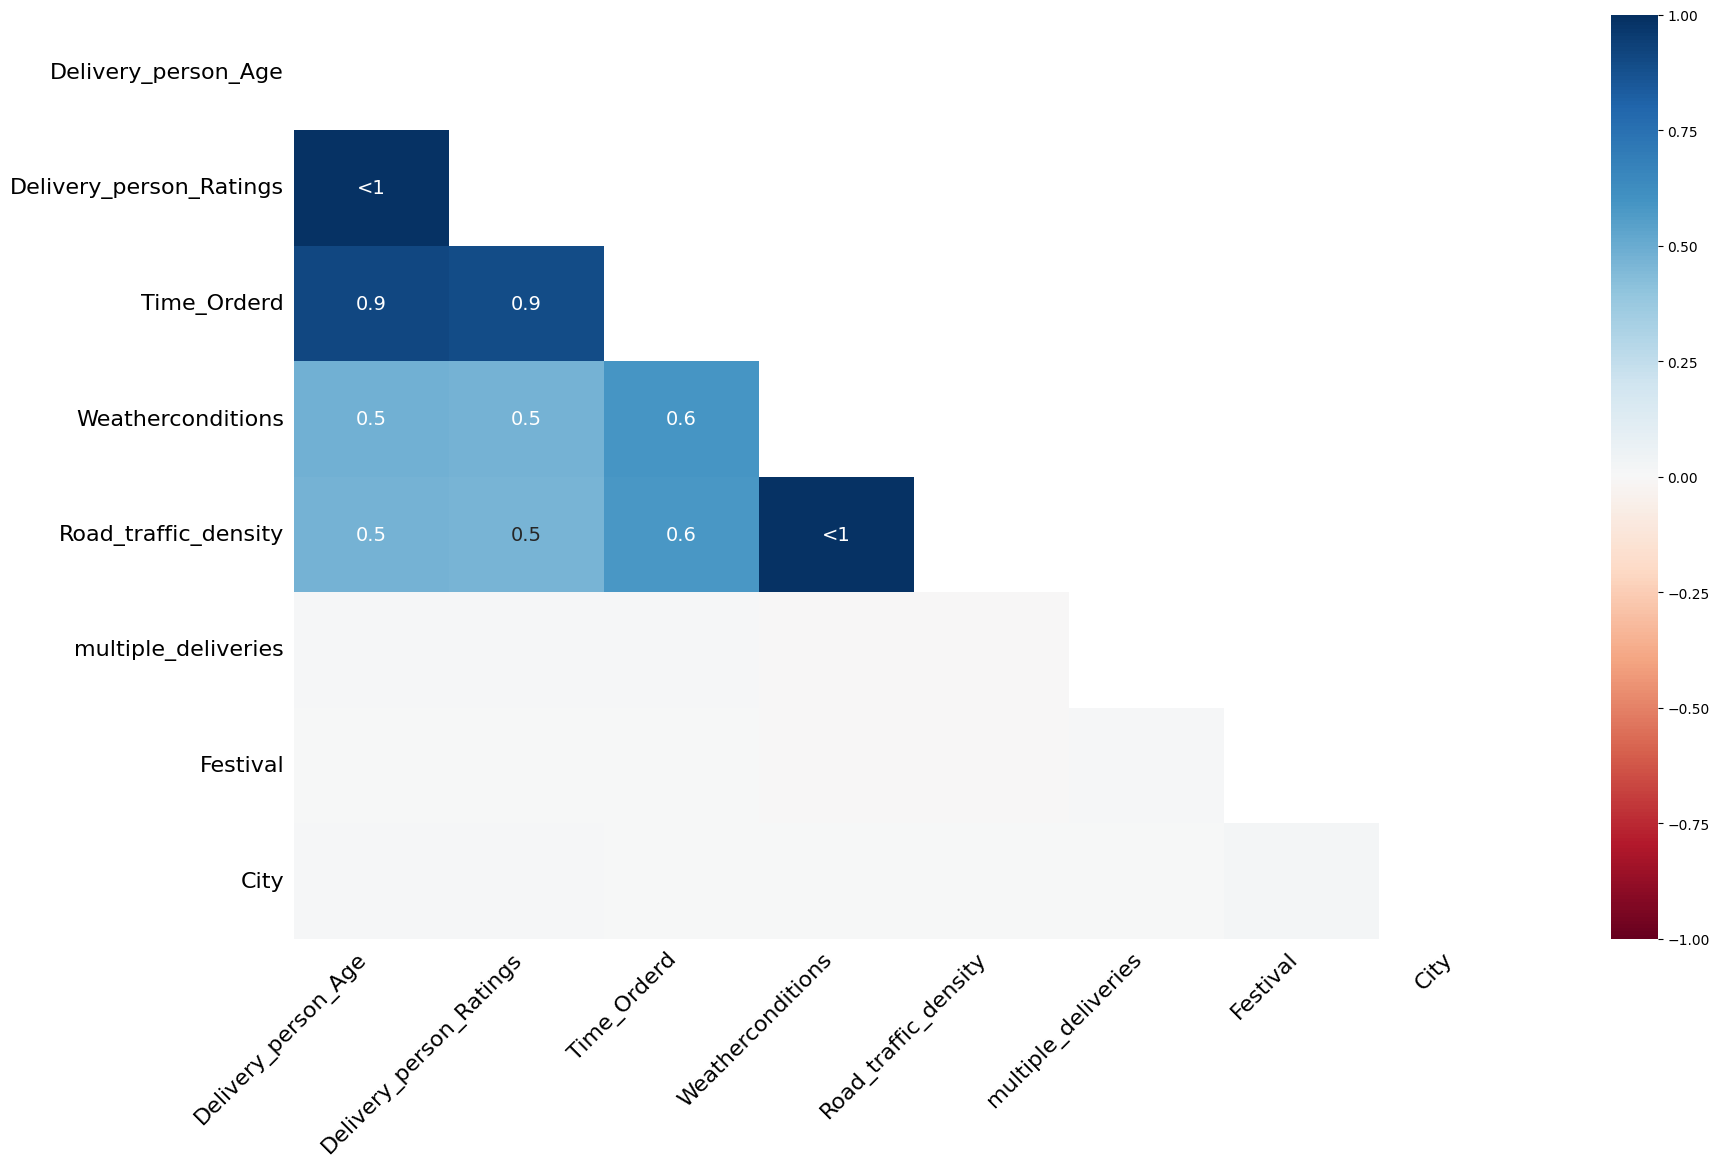

In [100]:
# Corelation of missing data
msno.heatmap(data)

<Axes: >

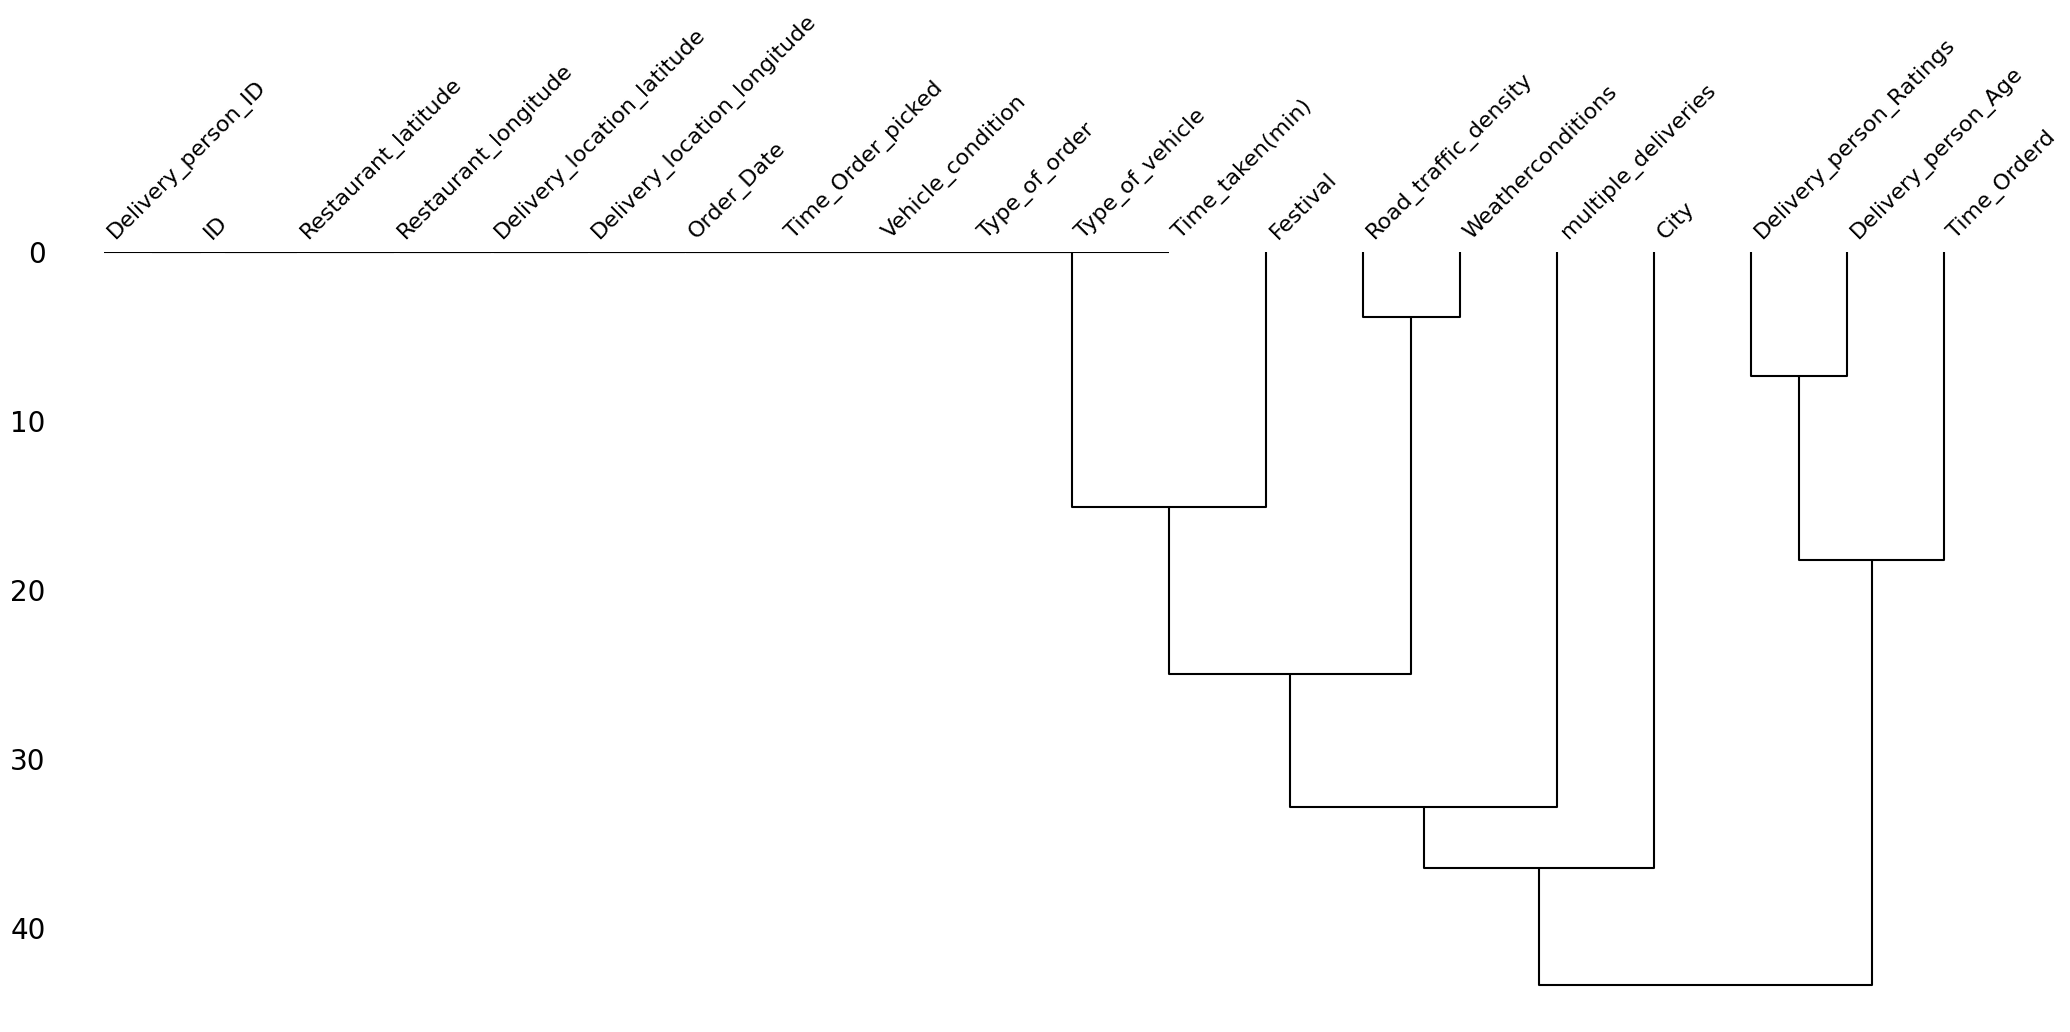

In [101]:
# Dendogram of missing values
msno.dendrogram(data)

#### This figure shows that -
- Type_of_vehicle and Festival column have missing values that are highly corelated.

### Data Cleaning.

In [102]:
# Name of columns in the data
data.columns.to_list()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [103]:
def rename_cols(data):
    """
    This function changes column names to a more friendly format.
    """
    return data.rename(
        {
           'Delivery_person_ID' : 'rider_id',
           'Delivery_person_Age' : 'age',
           'Delivery_person_Ratings' : 'ratings',
           'Delivery_location_latitude' : 'delivery_latitude',
           'Delivery_location_longitude' : 'delivery_longitude',  # fixed typo
           'Time_Orderd' : 'order_time',
           'Time_Order_picked' : 'order_picked_time',
           'Weatherconditions' : 'weather',
           'Road_traffic_density' : 'traffic',
           'City' : 'city_type',
           'Time_taken(min)' : 'time_taken'
        }, axis=1
    )

In [104]:
data = rename_cols(data)
data.columns = data.columns.str.lower()
data.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [105]:
# Check the duplicate rows in the data.
data.duplicated().sum()

np.int64(0)

#### Column wise cleaning.

1. id

In [106]:
print(f"There are {data['id'].nunique()} unique ids in the data.")

There are 45593 unique ids in the data.


This matches exact number of rows. Since it's unique, we can remove this column called id.

2. rider_id

In [107]:
print(f"There are {data['rider_id'].nunique()} unique rider_ids in the data.")

There are 1320 unique rider_ids in the data.


In [108]:
data['rider_id'].value_counts()

rider_id
PUNERES01DEL01       67
JAPRES11DEL02        67
VADRES08DEL02        66
RANCHIRES02DEL01     66
HYDRES04DEL02        66
                     ..
BHPRES15DEL03         7
GOARES01DEL03         7
KOLRES09DEL03         6
KOCRES16DEL03         6
BHPRES010DEL03        5
Name: count, Length: 1320, dtype: int64

- It can be seen here that there are city names included in the rider_id. Therefore let's extract them.

In [109]:
data['rider_id'].str.split("RES").str.get(0).rename("extracted_city")

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: extracted_city, Length: 45593, dtype: object

3. Age

In [110]:
# Since we saw earlier that age is object type, let's convert it to numeric/float type and check it's description.
data[['age']].astype(float).describe()

,age
count,43739.000000
mean,29.567137
std,5.815155
min,15.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


- This shows that minimum age of the rider is 15 and that's problematic not wrt dataset but ethical concerns.

<Axes: ylabel='age'>

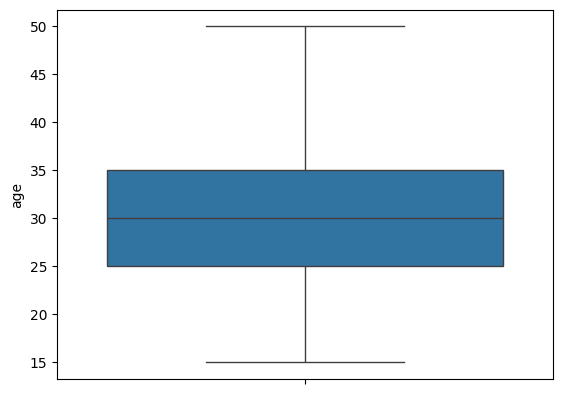

In [111]:
# Boxplot of age column.
sns.boxplot(data = data['age'].astype(float))

In [112]:
# Rows of data where age is less than 18.
data[data['age'].astype(float) < 18]

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [113]:
print(f'There are {len(data[data['age'].astype(float) < 18])} rows where age is less than 18. They are minors.')

There are 38 rows where age is less than 18. They are minors.


#### Observations-
1. The star ratings of all the riders is 1.
2. The vehicle condition of these riders is very bad.
3. No weather and traffic conditions available.
4. Age of all these riders is 15 which is below the permissable age to drive a vehicle.
5. Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.

- Seems like removing this data for now makes more sense then fixing it because a lot of data is missing.

### 4. Ratings

In [114]:
data['ratings'].astype(float).describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

#### It is to be noted here that 6 star rating is not possible. Generally we only have max 5 star rating.

<Axes: ylabel='ratings'>

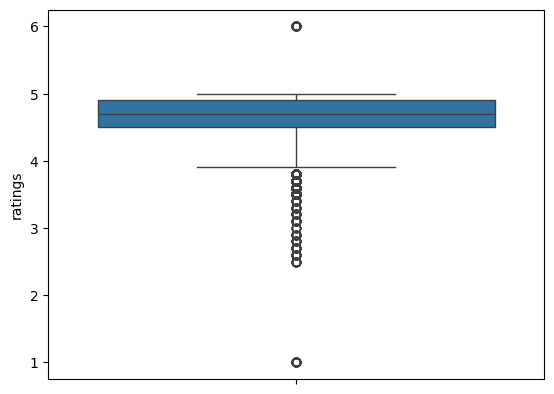

In [115]:
sns.boxplot(data['ratings'].astype(float))

In [116]:
# Finding rows where ratings are more than 5.
print(f"There are {len(data[data['ratings'].astype(float) > 5])} rows where ratings are more than 5.")

There are 53 rows where ratings are more than 5.


#### 5. Location columns.

In [117]:
location_columns = data.iloc[ : , 4 : 8]
location_columns.sample(10)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
41863,18.534080,73.898520,18.594080,73.958520
36544,17.410371,78.437225,17.490371,78.517225
22920,17.458998,78.500366,17.548998,78.590366
41977,30.885814,75.786976,30.975814,75.876976
4597,26.911378,75.789034,26.961378,75.839034
30111,18.551440,73.804855,18.591440,73.844855
13633,18.927584,72.832585,19.037584,72.942585
4759,18.569156,73.774723,18.639156,73.844723
20499,12.970221,77.645396,13.000221,77.675396
18092,0.000000,0.000000,0.060000,0.060000


#### Valid values for lat and long-
- India lies to the north of the equator between 6° 44′ and 35° 30′ north latitude and 68° 7′ and 97° 25′ east longitude. So lower bound should be 6.44 for latittude and lower bound for longitude should be 68.7

In [118]:
location_columns.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [119]:
lower_lat = 6.44
lower_long = 68.70

In [120]:
# Rows of data where latitude is less than lower bound or longitude is less than lower bound.
location_columns[
    (location_columns['restaurant_latitude'].astype(float) < lower_lat) |
    (location_columns['restaurant_longitude'].astype(float) < lower_long) |
    (location_columns['delivery_latitude'].astype(float) < lower_lat) |
    (location_columns['delivery_longitude'].astype(float) < lower_long)
    ].sample(5)

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
27597,0.0,0.0,0.13,0.13
35345,0.0,0.0,0.04,0.04
10381,0.0,0.0,0.11,0.11
41985,0.0,0.0,0.11,0.11
9017,0.0,0.0,0.04,0.04


In [121]:
print(f"{len(location_columns[
    (location_columns['restaurant_latitude'].astype(float) < lower_lat) |
    (location_columns['restaurant_longitude'].astype(float) < lower_long) |
    (location_columns['delivery_latitude'].astype(float) < lower_lat) |
    (location_columns['delivery_longitude'].astype(float) < lower_long)
    ])} rows have latitude/longitude less than the lower bound.")

4071 rows have latitude/longitude less than the lower bound.


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

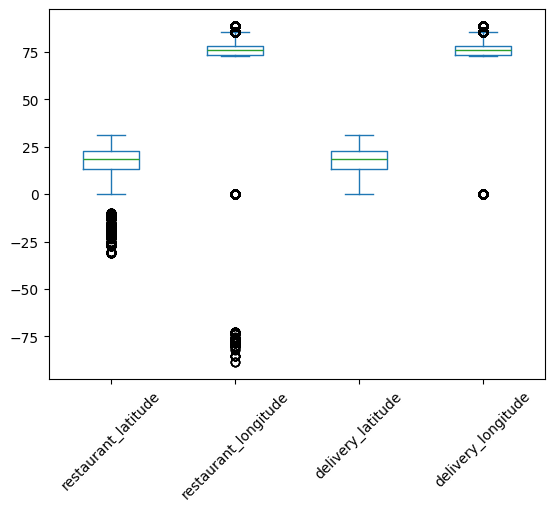

In [122]:
location_columns.plot(kind = 'box')
plt.xticks(rotation = 45)

- Negative Values are correct just we have to take absolute

(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

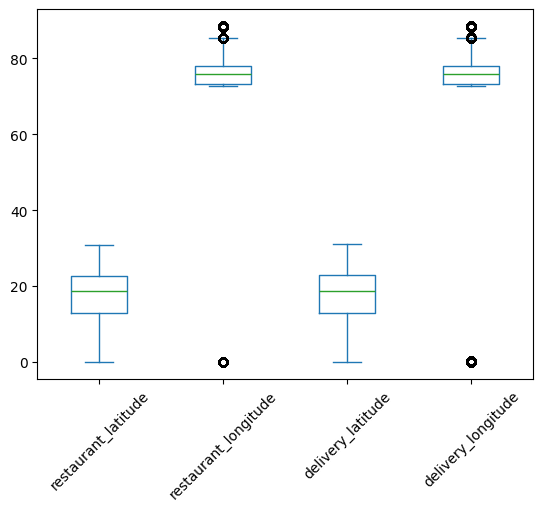

In [123]:
location_columns = location_columns.abs()
location_columns.plot(kind = 'box')
plt.xticks(rotation = 45)

In [124]:
location_columns[
    (location_columns['restaurant_latitude'].astype(float) < 1) |
    (location_columns['restaurant_longitude'].astype(float) < 1) |
    (location_columns['delivery_latitude'].astype(float) < 1) |
    (location_columns['delivery_longitude'].astype(float) < 1)
    ]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [125]:
print(f"{len(location_columns[
    (location_columns['restaurant_latitude'].astype(float) < 1) |
    (location_columns['restaurant_longitude'].astype(float) < 1) |
    (location_columns['delivery_latitude'].astype(float) < 1) |
    (location_columns['delivery_longitude'].astype(float) < 1)
    ])} rows have latitude/longitude less than 1")

3640 rows have latitude/longitude less than 1


In [126]:
for cols in location_columns.columns:
    np.where(location_columns[cols] < 1, np.nan, location_columns[cols])

location_columns

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


In [127]:
data.isna().sum()


id                         0
rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude        0
restaurant_longitude       0
delivery_latitude          0
delivery_longitude         0
order_date                 0
order_time              1731
order_picked_time          0
weather                  616
traffic                  601
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1200
time_taken                 0
dtype: int64

#### 6. Order Date

In [128]:
# Date Range

order_date = pd.to_datetime(data['order_date'],dayfirst=True)

order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [129]:
# min and maximum dates

order_date.agg(["min","max"]).set_axis(["start","end"],axis=0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [130]:
# Extract Day, Day name, Month and Year

def extract_datetime(series):
    date_col = pd.to_datetime(series, dayfirst=True)

    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

In [131]:
extract_datetime(data['order_date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


#### 7. Order time and Order picked time

In [132]:
# Extract Hour info from data

order_time_hr = pd.to_datetime(data.replace("NaN ",np.nan)['order_time'],format='mixed').dt.hour

order_time_hr

0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: order_time, Length: 45593, dtype: float64

In [133]:
def time_of_day(series):
    hours = pd.to_datetime(series, format="mixed").dt.hour
    return(
        np.select(condlist=[(series.between(6,12,inclusive='left')),
                            (series.between(12,17,inclusive='left')),
                            (series.between(17,20,inclusive='left')),
                            (series.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

# data['time_of_day'] = time_of_day(data.replace("NaN ",np.nan)['order_time'])

In [134]:
# Calculate pickup time.
order_time = pd.to_datetime(
    data["order_time"].replace("NaN ", np.nan),
    errors="coerce", dayfirst=True, format="mixed"
)

picked_time = pd.to_datetime(
    data["order_picked_time"].replace("NaN ", np.nan),
    errors="coerce", dayfirst=True, format="mixed"
)

pickup_diff = (picked_time - order_time).dt.total_seconds() / 60

# adjust: if negative, add 24*60 minutes
np.where(pickup_diff < 0, pickup_diff + 1440, pickup_diff)


array([15.,  5., 15., ..., 15.,  5.,  5.], shape=(45593,))

#### 8. Weather

In [135]:
data['weather'].value_counts()

# unique values
data['weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

#### 9. Traffic

In [136]:
# Unique values
data['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [137]:
data['traffic'] = data['traffic'].str.strip()
data['traffic'].unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

#### 10. Vehicle Condition

In [138]:
# unique values in column

np.sort(data['vehicle_condition'].unique())

array([0, 1, 2, 3])

#### 11. Type of order

In [139]:
data['type_of_order'].value_counts()
# unique values in column
data['type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [140]:
data['type_of_order'] = data['type_of_order'].str.strip()
data['type_of_order'].unique()

array(['Snack', 'Drinks', 'Buffet', 'Meal'], dtype=object)

#### 12. Type of vehicle

In [141]:
data['type_of_vehicle'].value_counts()

data['type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [142]:
data['type_of_vehicle'] = data['type_of_vehicle'].str.strip()
data['type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

#### 13. Multiple Deliveries

In [143]:
data['multiple_deliveries'].unique()

array(['0', '1', '3', nan, '2'], dtype=object)

In [144]:
data['multiple_deliveries'].replace("NaN ",np.nan).astype(float).unique()

array([ 0.,  1.,  3., nan,  2.])

#### 14. Festival

In [145]:
data['festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [146]:
data['festival'] = data['festival'].str.strip()
data['festival'].unique()

array(['No', 'Yes', nan], dtype=object)

#### 15. City type

In [147]:
data['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

In [148]:
data['city_type'] = data['city_type'].str.strip()
data['city_type'].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', nan], dtype=object)

#### 16. Time Taken

In [149]:
data['time_taken'].str.replace("(min) ","").astype(int)
data['time_taken']

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
45588    (min) 32
45589    (min) 36
45590    (min) 16
45591    (min) 26
45592    (min) 36
Name: time_taken, Length: 45593, dtype: object

In [150]:
def clean_data(dataframe):
    """
    This function cleans the whole data.
    """

    # Step 1: Make a copy
    df = data.copy()

    # Step 2: Fix location columns before assign()
    location_cols = ["restaurant_latitude", "restaurant_longitude",
                     "delivery_latitude", "delivery_longitude"]

    for col in location_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")   # convert to numeric
        df[col] = df[col].abs()                             # absolute values
        df[col] = df[col].where(df[col] >= 1, np.nan)       # replace <1 with NaN

    # Step 3: Continue rest of cleaning
    return (df.
            drop(columns='id').
            drop(df[df['age'].astype(float) < 18].index).
            drop(df[df['ratings'].astype(float) > 5].index).
            replace(to_replace=['NaN ', 'NaN'], value=np.nan).
            assign(
                extracted_city=lambda x: x['rider_id'].astype(str).str.split("RES").str.get(0),
                age=lambda x: x['age'].astype(float),
                ratings=lambda x: x['ratings'].astype(float),
                order_date=lambda date: pd.to_datetime(date['order_date'], dayfirst=True),
                order_day=lambda x: extract_datetime(x['order_date'])['day'],
                order_month=lambda x: extract_datetime(x['order_date'])['month'],
                order_day_of_week=lambda x: extract_datetime(x['order_date'])['day_of_week'],
                order_is_weekend=lambda x: extract_datetime(x['order_date'])['is_weekend'],
                order_time=lambda x: pd.to_datetime(x['order_time'], format='mixed'),
                order_picked_time=lambda x: pd.to_datetime(x['order_picked_time'], format='mixed'),
                pickup_time_minutes=lambda x: np.where(
                    (x["order_picked_time"] - x["order_time"]).dt.total_seconds() / 60 < 0,
                    (x["order_picked_time"] - x["order_time"]).dt.total_seconds() / 60 + 1440,
                    (x["order_picked_time"] - x["order_time"]).dt.total_seconds() / 60),
                order_time_hour=lambda x: x['order_time'].dt.hour,
                time_of_day=lambda x: time_of_day(x['order_time_hour']),
                weather=lambda x: (x['weather'].str.replace("conditions ", "").str.lower().replace("nan", np.nan)),
                traffic=lambda x: x['traffic'].str.strip().str.lower(),
                type_of_order=lambda x: x['type_of_order'].str.strip().str.lower(),
                type_of_vehicle=lambda x: x['type_of_vehicle'].str.strip().str.lower(),
                festival=lambda x: x['festival'].str.strip().str.lower(),
                city_type=lambda x: x['city_type'].str.strip().str.lower(),
                multiple_deliveries=lambda x: x['multiple_deliveries'].astype(float),
                time_taken=lambda x: (x['time_taken'].str.replace("(min) ", "").astype(int)),
                distance_km=lambda x: x.apply(
                    lambda row: geodesic(
                        (row["restaurant_latitude"], row["restaurant_longitude"]),
                        (row["delivery_latitude"], row["delivery_longitude"])
                    ).km if pd.notnull(row["restaurant_latitude"]) and pd.notnull(row["restaurant_longitude"]) 
                           and pd.notnull(row["delivery_latitude"]) and pd.notnull(row["delivery_longitude"])
                    else np.nan,
                    axis=1
                )
            ).
            drop(columns=['order_time', 'order_picked_time'])
           )


<Axes: >

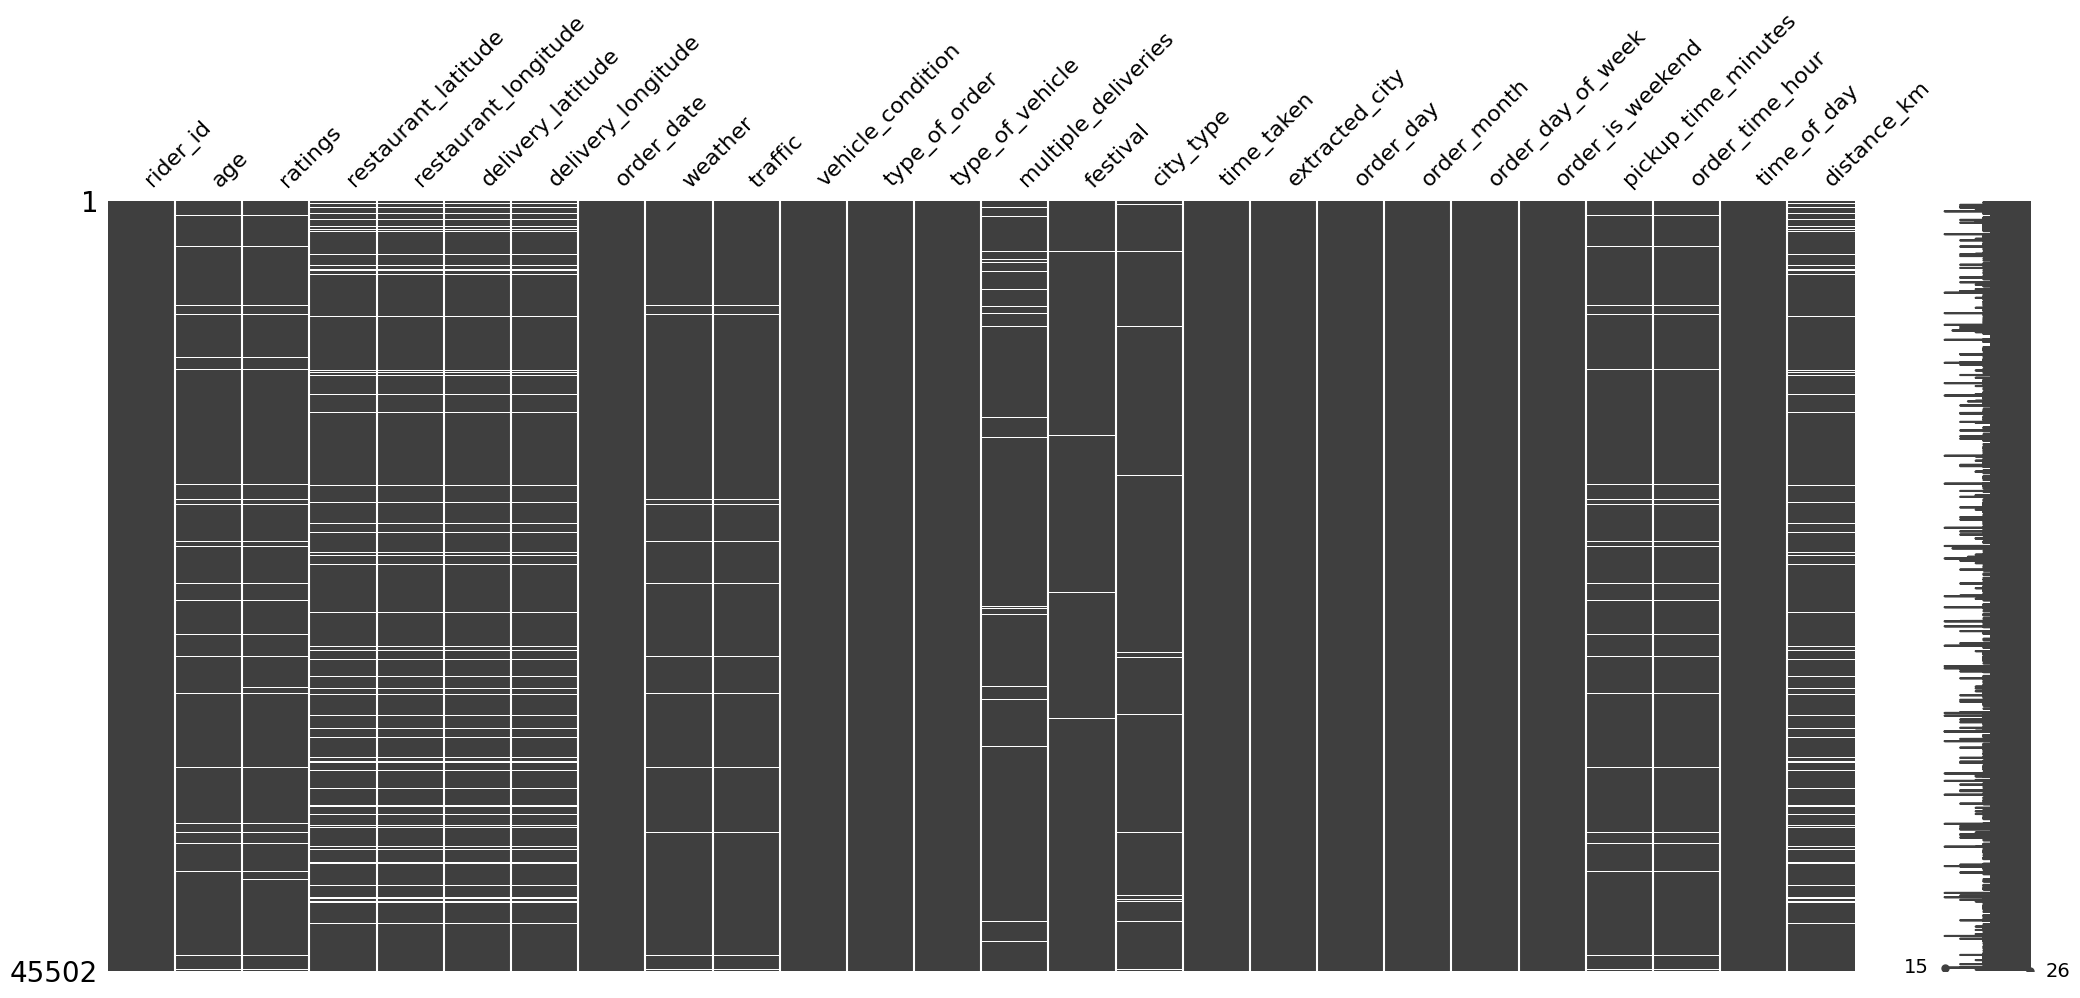

In [151]:
msno.matrix(clean_data(data))

In [152]:
new_data = clean_data(data)
new_data.sample(10)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,extracted_city,order_day,order_month,order_day_of_week,order_is_weekend,pickup_time_minutes,order_time_hour,time_of_day,distance_km
13795,KOCRES010DEL02,36.0,4.7,10.035573,76.336958,10.055573,76.356958,2022-02-15,sunny,low,...,11,KOC,15,2,Tuesday,0,15.0,9.0,morning,3.114584
1508,INDORES13DEL02,26.0,4.6,22.745049,75.892471,22.765049,75.912471,2022-03-21,fog,low,...,14,INDO,21,3,Monday,0,5.0,10.0,morning,3.020737
2239,LUDHRES15DEL02,38.0,4.1,30.899584,75.809346,30.979584,75.889346,2022-02-12,cloudy,low,...,31,LUDH,12,2,Saturday,1,10.0,23.0,night,11.709651
7559,COIMBRES01DEL02,24.0,4.9,11.016298,76.972076,11.036298,76.992076,2022-03-26,sandstorms,high,...,22,COIMB,26,3,Saturday,1,10.0,11.0,morning,3.109811
7622,SURRES16DEL02,20.0,4.8,21.160437,72.774209,21.290437,72.904209,2022-03-27,windy,jam,...,24,SUR,27,3,Sunday,1,15.0,21.0,night,19.730961
24354,MYSRES03DEL02,25.0,4.2,12.299524,76.642620,12.429524,76.772620,2022-03-31,windy,medium,...,33,MYS,31,3,Thursday,0,10.0,17.0,evening,20.166931
38732,SURRES15DEL03,26.0,4.6,21.160522,72.771477,21.220522,72.831477,2022-03-28,stormy,jam,...,18,SUR,28,3,Monday,0,10.0,19.0,evening,9.107580
32479,MUMRES07DEL01,29.0,4.7,19.091458,72.827808,19.101458,72.837808,2022-03-24,sunny,low,...,22,MUM,24,3,Thursday,0,10.0,10.0,morning,1.527305
42194,MYSRES02DEL01,28.0,4.6,12.304569,76.643622,12.414569,76.753622,2022-03-23,cloudy,jam,...,34,MYS,23,3,Wednesday,0,5.0,19.0,evening,17.064482
40114,PUNERES04DEL03,21.0,4.0,18.514210,73.838429,18.604210,73.928429,2022-03-14,sandstorms,jam,...,35,PUNE,14,3,Monday,0,5.0,20.0,night,13.766114
